# Importing Required Libraries

In [11]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics



 ---

 ---

# Data Collection and Processing

Loading the calories burnt dataset into pandas dataframe

**Calories dataset includes the calories burnt for different persons**

In [49]:

calories_dataset = pd.read_csv('/content/calories.csv')



Printing the first 5 rows of the calories dataframe

In [50]:

calories_dataset.head()



,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


---


Loading the users details dataset to pandas dataframe

**Exercise dataset includes all the details of the person**

In [14]:

exercise_data = pd.read_csv('/content/exercise.csv')



Printing the first 5 rows of the dataframe

In [15]:

exercise_data.head()



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


---

Combining the above two dataframes

In [16]:

calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)



Printing the first 5 rows of the combined dataframe

In [17]:

calories_data.head()



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


Printing the number of rows and columns of the dataframe

In [18]:

calories_data.shape



(15000, 9)

Getting more information about the dataframe

In [19]:

calories_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Checking for missing values

In [20]:

calories_data.isnull().sum()



,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


Printing the statistical measures of the dataframe

In [21]:

calories_data.describe()



,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


---
---

# Data Visulization

In [22]:

sns.set()



Plotting the gender column in count plot

<Axes: xlabel='count', ylabel='Gender'>

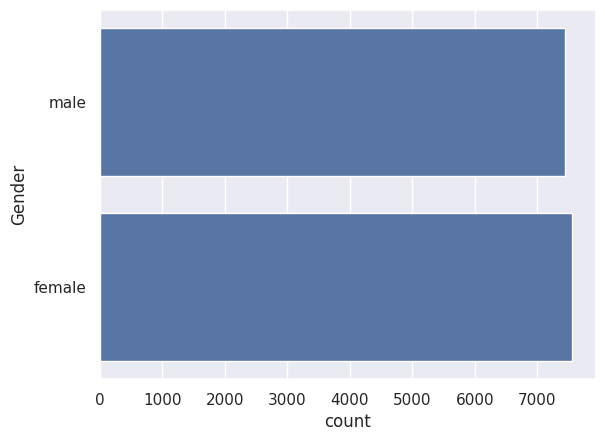

In [23]:

sns.countplot(calories_data['Gender'])



Finding the distribution of "Age" column

<Axes: xlabel='Age', ylabel='Count'>

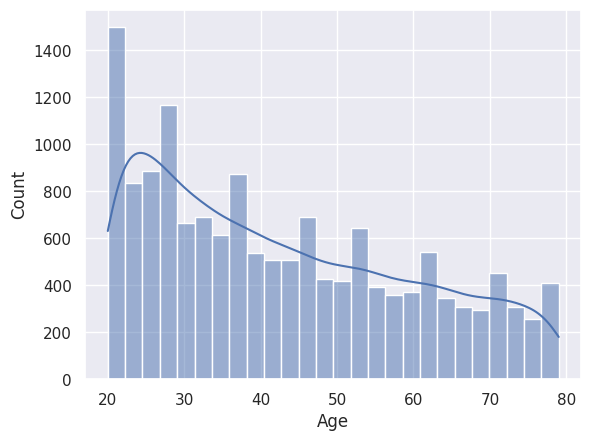

In [26]:

sns.histplot(calories_data['Age'], kde=1)



Finding the distribution of "Height" column

<Axes: xlabel='Height', ylabel='Count'>

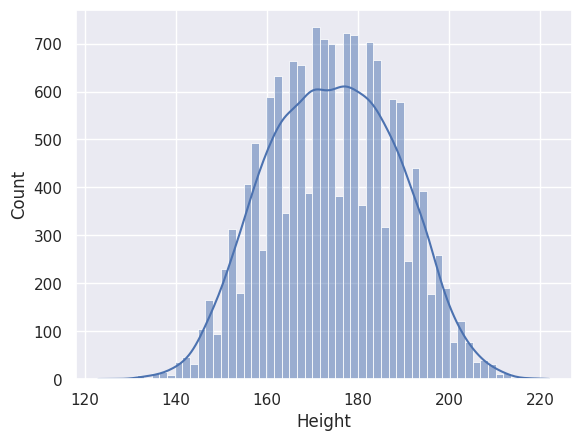

In [28]:

sns.histplot(calories_data['Height'], kde=2)



Finding the distribution of "Weight" column


<Axes: xlabel='Weight', ylabel='Count'>

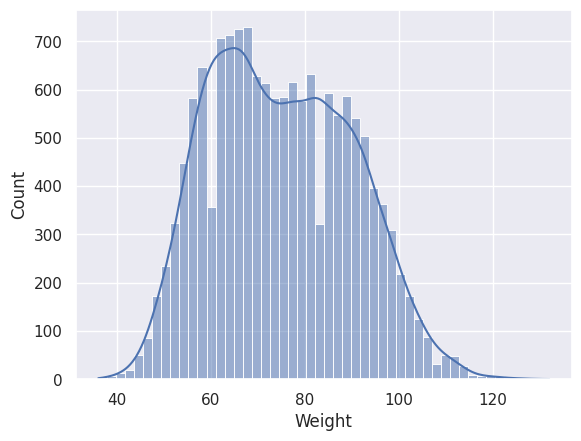

In [30]:

sns.histplot(calories_data['Weight'], kde=1)



---
---

# Finding the correlation in the dataframe

In [32]:

calories_data['Gender'] = calories_data['Gender'].map({'male': 0, 'female': 1})

correlation = calories_data.corr()



## Constructing a heatmap to understand the correlation

<Axes: >

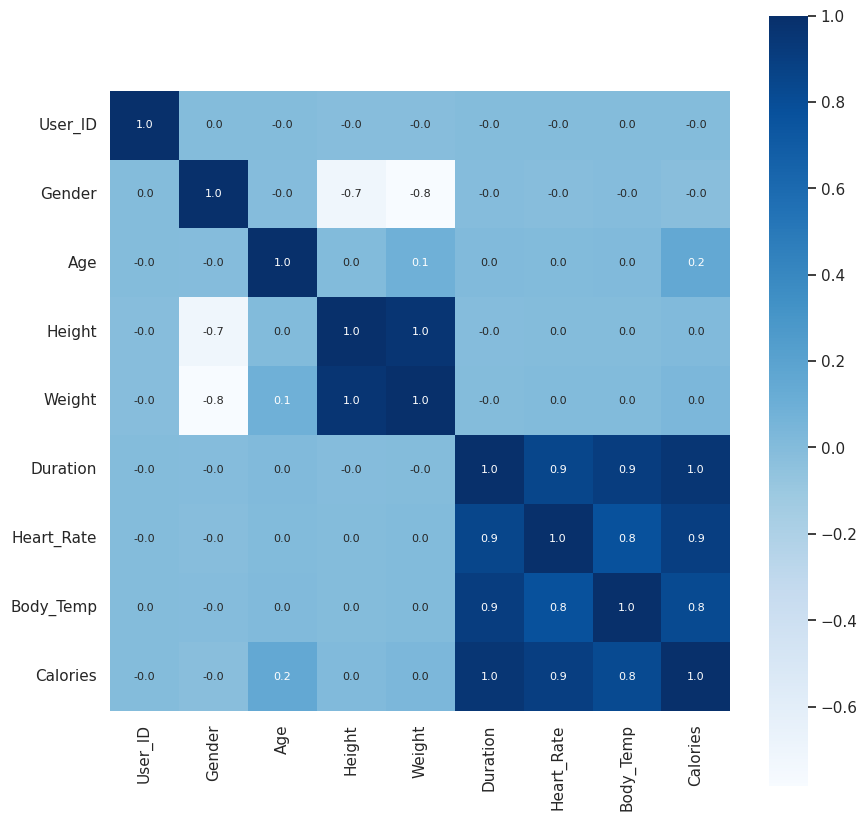

In [35]:

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')



---
---

# Converting the text data to numerical values

In [36]:

calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)



In [37]:

calories_data.head()



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


---
---

# Splitting the Features and Targets

In [38]:

X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']



In [39]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [40]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


---
---

# Splitting the data into training data and Test data

In [41]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)



(15000, 7) (12000, 7) (3000, 7)


---
---

# Model Training

## XGBoost Regressor

In [51]:

model = XGBRegressor()



Training the model with X_train

In [43]:

model.fit(X_train, Y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

---
---

# Model Evaluation

Prediction on testing data


In [44]:

test_data_prediction = model.predict(X_test)

print(test_data_prediction)



[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Mean abosute error for the testing data

In [45]:

mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("Mean Absolute Error = ", mae)



Mean Absolute Error =  1.4833678883314132


---
---
---

# Predictive System

In [48]:

input_data = (1,27,154.0,58.0,10.0,81.0,39.8)
# Gender, Age, Height, Weight, Duration, Heart_Rate, Body_Temp

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

print("Calories Burnt =", prediction[0])



Calories Burnt = 35.35871
